# Lab 1 - Fitting Probability Models

This lab has been converted to Python by Daniel Worrall. Any errors are my fault. October 2017.
This lab has been edited by Philipp Henzler and Mohamed Sayed. Any errors are now our fault. October 2019
This lab has been edited by Mohamed Sayed. Any errors are now my fault, again. October 2020.
Edited again by Maria Miscouridou, October 2021.

In this lab we will cover three different ways to fit probability distributions to data. For all three parts, we will generate some dummy data points, $X$, from a normal distribution with known paramters. We will then pretend to not know these parameters and find a way of estimating them given the data points $X$. Here our data is one dimensional and continuous, so we will focus on fitting a univariate normal distributions to $X$.

You will find three Jupyter files in which you should fill in the **TODOs** sections. 

- `pract1_a.ipynb`
Here we will use maximum likelihood (ML) to find the parameters of the normal distribution which is most likely given the data.

- `pract1_b.ipynb`
In the second part of the lab we will introduce some prior information about the parameters and find the maximum a posteriori (MAP) fit.

- `pract1_c.ipynb`
Finally, we will cover parameter estimation from a Bayesian perspective.


There should also be four other python module files in our directory:
- `normal.py`
- `normal_inv_gamma.py`
- `log_normal.py`
- `plot_normal.py`


There might be TODOs in these files too, and some sections will need you to implement code in these files too.

# Lab 1: Part A: Maximum Likelihood
We will use maximum likelihood (ML) to fit both parameters ($\mu$ and $\sigma$) of a univariate normal distribution to the data.

In [210]:
%load_ext autoreload
%autoreload 2

# For matrices
import numpy as np

# For plotting
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('font', size=15)

# Our custom modules
from normal import *
from log_normal import *
from plot_normal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [211]:
# Generate some data points from a normal distribution 
mu = 1     # mean
sigma = 2  # standard deviation = sqrt(variance)
N = 20     # number of datapoints

#X is the generated data from our groundtruth distribution.
X = mu + sigma*np.random.randn(N,1)


## ML Parameter Estimation of normal

### TODO 1
We now have data $X$ drawn from the groundtruth distribution. The job is to now estimate what this distribution using $X$. On paper derive the ML parameter estimates (you can also find this derivation in the lecture notes) for the normal distribution and then insert the equations here. Note: Here, each data point in $X$ is generated independently of one another (i.i.d) - this will not always be the case with other data.

In [212]:
muML =  sum(map(float,X))/N   # So put your answer here in place of zero.

errors = []
for i in range(N):
    error = (X[i] - muML)**2
    errors.append(error)
sigmaML = np.sqrt(sum(map(float, errors))/N) # So put your answer here in place of zero.
print(muML)
print(sigmaML)

1.3972151557965562
1.8062091624944576


Estimated Mean: 1.40
Estimated Standard Deviation: 1.81


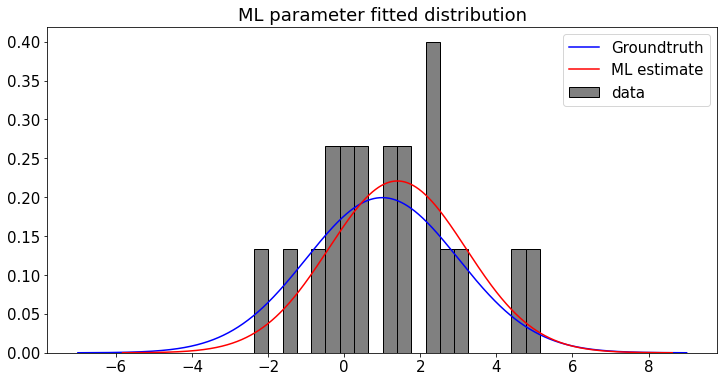

In [213]:
print("Estimated Mean: " + "{:.2f}".format(muML))
print("Estimated Standard Deviation: " + "{:.2f}".format(sigmaML))

# Plotting univariate normal
# Normalizing histograms - assuming bins are evenly sized
[hist_count, bin_edges] = np.histogram(X, 20)
bin_width = bin_edges[1] - bin_edges[0]
hist_pos = (bin_edges[1:] + bin_edges[:-1]) / 2.

# Plot figure
plt.bar(bin_edges[:-1], hist_count/(np.sum(hist_count)*bin_width), color='gray', 
        edgecolor='k', width=bin_width, label='data')
plot_normal(mu, sigma, 'b', 'Groundtruth')
plot_normal(muML, sigmaML, 'r', 'ML estimate')
plt.legend()
plt.title('ML parameter fitted distribution')
plt.show()


### Likelihood function Visualization and Brute Forcing

So far, we've found the maximum likelihood solution analytically. You've derived the solution based on mathematical machinery. But now we're going to empirically show that our ML estimate is accurate by plotting the values of both the likelihood and the log-likelihood over a range of $\sigma$ and $\mu$ in a brute force manner. This step is just to give us more confidence in our analytical solution. 

The code below will compute the likelihood that the data $X$ fits a range of $\mu$ and $\sigma$. It will then plot this likelihood in a heat plot (similar to what you see in your notes). You will see a few markers. The blue circle is the peak of this likelihood plot - the peak is where the likelihood is at a maximum and should line up with the ML estimate represented by the red cross.


## Note
In the code below, there may be nothing missing, but functions like `normal()` and `log_normal()` (which are in separate files) are being called, yet are potentially blank. To accomplish these __TODO__s, fill them in!

### TODO 2
Compute the likelihood and log-likelihood functions for the normal distribution: See `normal.py` and `log_normal.py`
### TODO 3
Empirically verify that the peak of the graph (maximum likelihood, blue circle) is at the same position as your ML solution (red cross).

You do not need to edit the next section. Just run it to plot the results of your adapted `normal.py` and `log_normal.py`.

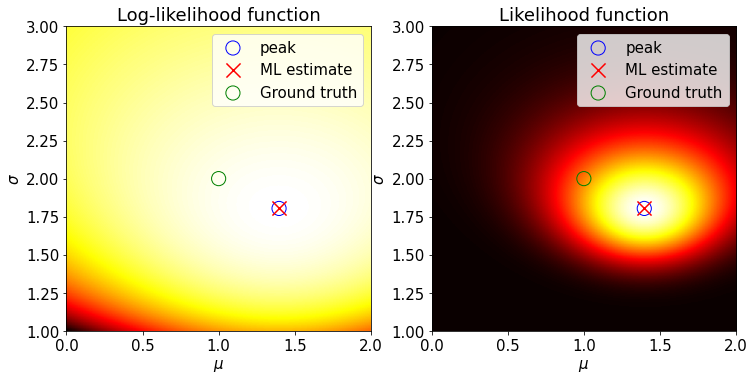

In [214]:
# Brute force compute the likelihood and log-likelihood functions

# create mu and sigma ranges for graphs
offset = 1.
sigma_range = np.linspace(sigma-offset, sigma+offset, num=int(2.*offset / 0.01))
mu_range = np.linspace(mu-offset, mu+offset, num=int(2.*offset / 0.01))

# initialize likelihood functions with ranges
lfun = np.zeros((len(sigma_range), len(mu_range)))
llfun = np.zeros((len(sigma_range), len(mu_range)))

# call functions that you've filled out to get likelihood and log-likelihood values for each mu and sigma.
for i, m in enumerate(mu_range):
    for j, s in enumerate(sigma_range):
        lfun[j,i] = normal(X, m, s)
        llfun[j,i] = log_normal(X, m, s)
        
# Plot log-likelihood function
plt.subplot(1,2,1)
plt.imshow(llfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Log-likelihood function")

## Maximum of log-likelihood function
flat_idx = np.argmax(llfun)
sigma_idx, mu_idx = np.unravel_index(flat_idx, llfun.shape)
mu_max = mu_range[mu_idx]
sigma_max = sigma_range[sigma_idx]
val = llfun[mu_idx, sigma_idx]

## Plot points
plt.scatter(mu_max, sigma_max, facecolors='none', edgecolors='b', marker='o', s=200, label='peak')
plt.scatter(muML, sigmaML, color='r', marker='x', s=200, label='ML estimate')
plt.scatter(mu, sigma, facecolors='none', edgecolors='g', marker='o', s=200, label='Ground truth')
plt.legend()

# Plot likelihood function
plt.subplot(1,2,2)
plt.imshow(lfun, cmap="hot", origin="lower", 
           extent=[mu_range[0], mu_range[-1], sigma_range[0], sigma_range[-1]])
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")
plt.title("Likelihood function")

## Maximum of log-likelihood function
flat_idx = np.argmax(lfun)
sigma_idx, mu_idx = np.unravel_index(flat_idx, llfun.shape)
mu_max = mu_range[mu_idx]
sigma_max = sigma_range[sigma_idx]
val = llfun[mu_idx, sigma_idx]

## Plot points
plt.scatter(mu_max, sigma_max, facecolors='none', edgecolors='b', marker='o', s=200, label='peak')
plt.scatter(muML, sigmaML, color='r', marker='x', s=200, label='ML estimate')
plt.scatter(mu, sigma, facecolors='none', edgecolors='g', marker='o', s=200, label='Ground truth')
plt.legend()
plt.show()

# Questions

1. Why don't values from the ML estimate and the peak match with the ground truth (i.e. $\mu$ and $\sigma$)?
2. What happens if you increase the number of points?
3. BONUS QUESTION: Sometimes you run into numerical issues with a higher number of points and you dont get any meaningful results. Why and how could you fix this?
